In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

A1

Playing First Derivative Signal:


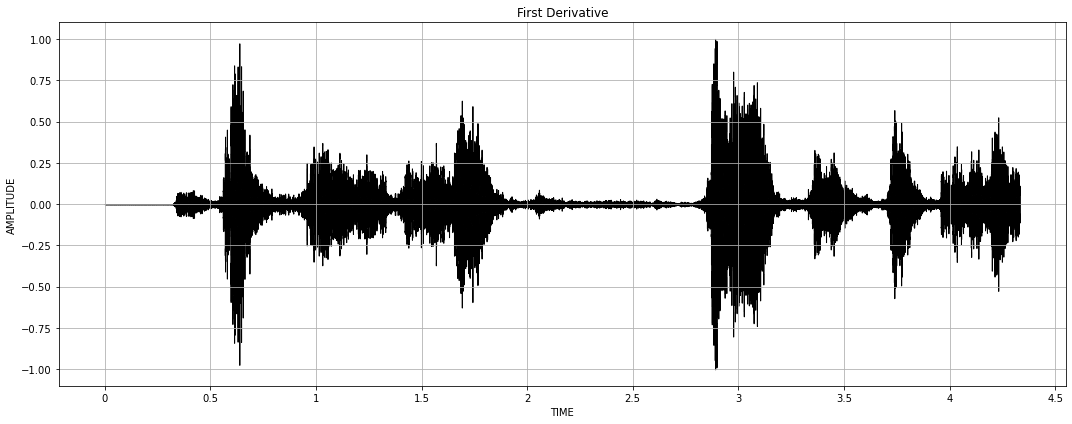

In [47]:
# Load audio file
y, sample_rate = librosa.load("AI_IN_speechprocessing.wav")

# Compute first derivative of the audio signal
first_derivative = np.diff(y)
first_derivative /= np.max(np.abs(first_derivative))  # Normalize

print("Playing First Derivative Signal:")

# Plotting the first derivative
plt.figure(figsize=(15, 6))
librosa.display.waveshow(first_derivative, sr=sample_rate, color='black')
plt.title('First Derivative')
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.grid(True)
plt.tight_layout()
plt.show()

# Play the first derivative of the audio signal
ipd.Audio(first_derivative, rate=sample_rate)


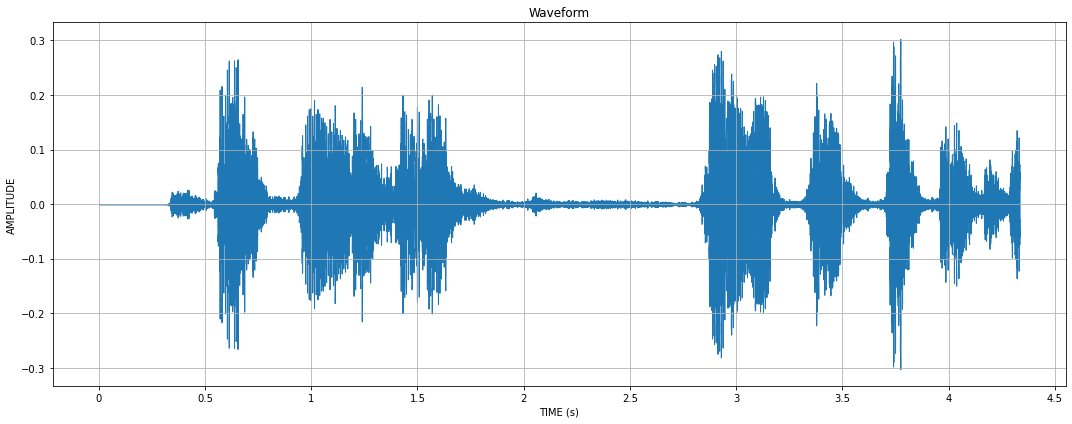

In [46]:
plt.figure(figsize=(15, 6))
librosa.display.waveshow(y, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('TIME (s)')
plt.ylabel('AMPLITUDE')
plt.grid(True)
plt.tight_layout()
plt.show()
# Playing back the audio
ipd.Audio(y, rate=sample_rate)

In [ ]:
A2

C:\Users\dines\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dines\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\dines\AppData\Local\Temp\ipykernel_7060\1230559148.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_intervals)), speech_intervals, 'ro', label='Speech intervals', color='black')
C:\Users\dines\AppData\Local\Temp\ipykernel_7060\1230559148.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_intervals), len(speech_intervals) + len(silence_intervals)), silence_intervals,

Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 4.101433722527473


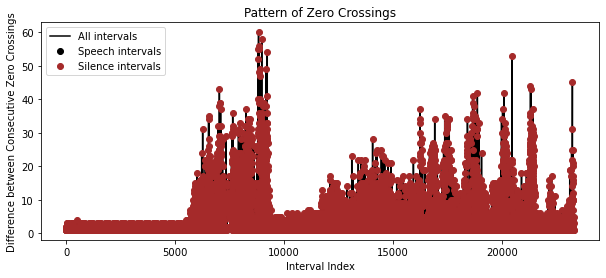

In [44]:

zero_crossings = np.where(np.diff(np.sign(first_derivative)))[0]
zero_crossing_diffs = np.diff(zero_crossings)
threshold = 1000

# Distinguish between speech and silence based on the threshold
speech_intervals = zero_crossing_diffs[zero_crossing_diffs > threshold]
silence_intervals = zero_crossing_diffs[zero_crossing_diffs <= threshold]

# Calculate average lengths
avg_speech_interval_length = np.mean(speech_intervals)
avg_silence_interval_length = np.mean(silence_intervals)

# Print average lengths
print("Average length between consecutive zero crossings in speech regions:", avg_speech_interval_length)
print("Average length between consecutive zero crossings in silence regions:", avg_silence_interval_length)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(zero_crossing_diffs, label='All intervals', color='black')
plt.plot(np.arange(len(speech_intervals)), speech_intervals, 'ro', label='Speech intervals', color='black')
plt.plot(np.arange(len(speech_intervals), len(speech_intervals) + len(silence_intervals)), silence_intervals, 'bo', label='Silence intervals', color='brown')
plt.title('Pattern of Zero Crossings')
plt.xlabel('Interval Index')
plt.ylabel('Difference between Consecutive Zero Crossings')
plt.legend()
plt.show()

A3

The length Duration of first audio file: 6.013514739229025 seconds
The length Duration of Second audio file: 6.177868480725624 seconds


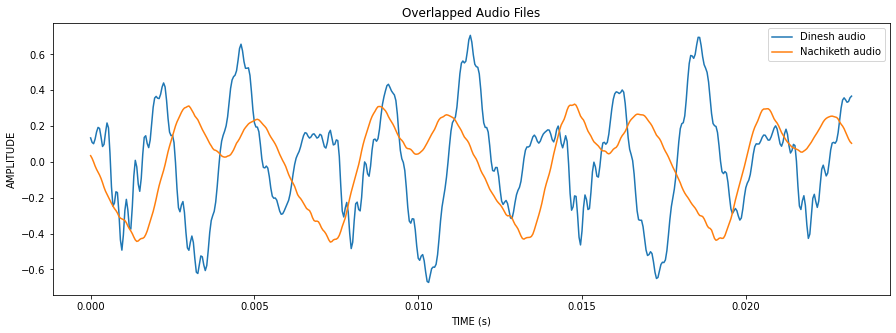

In [41]:
Dinesh_file = r'voice1.wav'
Nachiketh_file = r'voice2.wav'

# Load audio signals
y1, sr1 = librosa.load(Dinesh_file)
y2, sr2 = librosa.load(Nachiketh_file)

# Duration of audio files
duration1 = librosa.get_duration(y=y1, sr=sr1)
duration2 = librosa.get_duration(y=y2, sr=sr2)

print("The length Duration of first audio file:", duration1, "seconds")
print("The length Duration of Second audio file:", duration2, "seconds")

# Remove silence function
def remove_silence(y, sr, threshold=0.01):
    yt = librosa.effects.trim(y, top_db=threshold)
    return yt[0]

# Trim silence from audio signals
Dinesh_trimmed = remove_silence(y1, sr1)
Nachiketh_trimmed = remove_silence(y2, sr2)

# Calculate the time axes for the trimmed audio files
time1 = np.linspace(0, len(Dinesh_trimmed) / sr1, len(Dinesh_trimmed))
time2 = np.linspace(0, len(Nachiketh_trimmed) / sr2, len(Nachiketh_trimmed))

# Plot the trimmed audio files
plt.figure(figsize=(15, 5))
plt.plot(time1, Dinesh_trimmed, label='Dinesh audio')
plt.plot(time2, Nachiketh_trimmed, label='Nachiketh audio')
plt.legend()
plt.xlabel('TIME (s)')
plt.ylabel('AMPLITUDE')
plt.title('Overlapped Audio Files')
plt.show()

A4

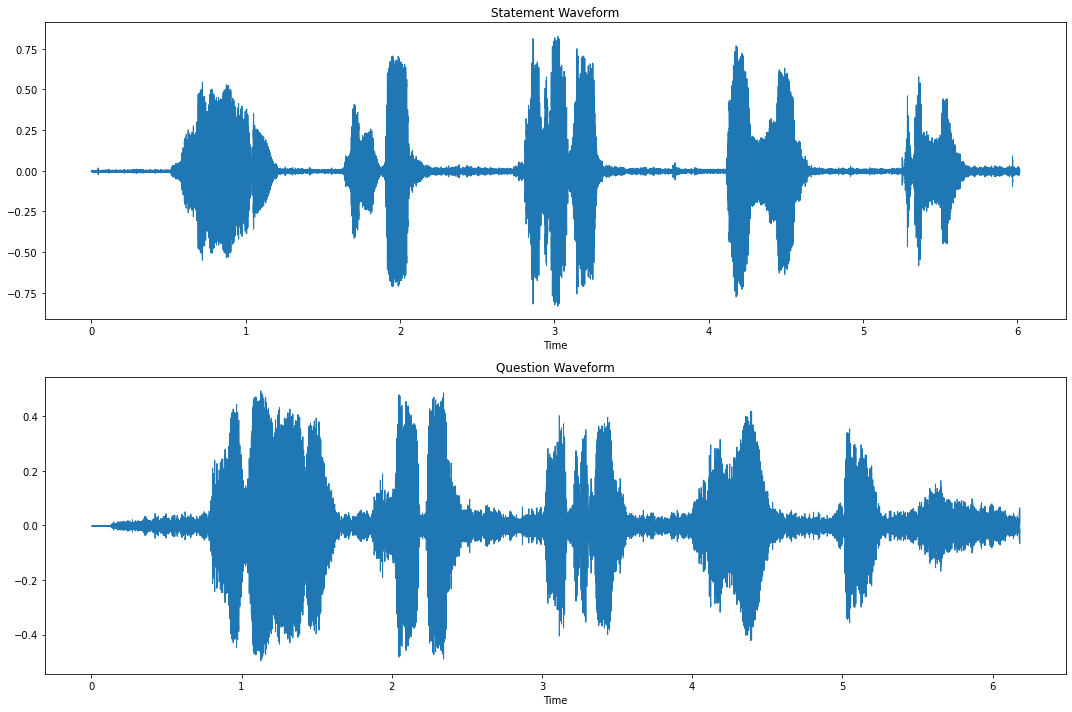

In [39]:

statement_signal, sr_statement = librosa.load(Dinesh_file) # Load audio signals
question_signal, sr_question = librosa.load(Nachiketh_file)
plt.figure(figsize=(15, 10)) # Plot waveforms
plt.subplot(2, 1, 1)
librosa.display.waveshow(statement_signal, sr=sr_statement)
plt.title('Statement Waveform')
plt.subplot(2, 1, 2)
librosa.display.waveshow(question_signal, sr=sr_question)
plt.title('Question Waveform')
plt.tight_layout()
plt.show()